In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
from sklearn import metrics
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import warnings
warnings.filterwarnings("ignore")

In [4]:
test = pd.read_csv('/Users/annamitchell/Desktop/GA_Docs/Projects/Ames_Project_3/Datasets/test_clean_model.csv')

In [5]:
train = pd.read_csv('/Users/annamitchell/Desktop/GA_Docs/Projects/Ames_Project_3/Datasets/train_clean_model.csv')

In [8]:
#original_train = pd.read_csv('/Users/annamitchell/Desktop/GA_Docs/Projects/AMProject_3/Datasets/train.csv')

In [9]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [10]:
label_encoder = LabelEncoder()
train.iloc[:,0] = label_encoder.fit_transform(train.iloc[:,0]).astype('float64')

### Inverse of log1p, changing saleprice back to USD

In [11]:
#train['saleprice'] = np.log1p(train['saleprice'])
#train['saleprice'] = np.expm1(train['saleprice'])

In [19]:
print(sorted(train.columns))

['Unnamed: 0', 'attached_garage', 'banked', 'briardale', 'bsmt_exposure', 'culdesac', 'exter_cond', 'floating_village', 'full_bath', 'garage_area', 'gr_liv_area', 'has_basement', 'hillside', 'kitchen_qual', 'mas_vnr_area', 'northridge', 'northridge_hts', 'offsite_feature', 'overall_qual', 'paved_drive', 'residential_low', 'residential_other', 'roof_matl', 'roof_style', 'saleprice', 'total_bsmt_sf', 'year_built']


In [20]:
train['total_bsmt_sf'][train.total_bsmt_sf.isnull()] = 0

In [21]:
train['garage_area'][train.garage_area.isnull()] = 0

In [22]:
train.isnull().sum()

Unnamed: 0           0
overall_qual         0
year_built           0
roof_style           0
roof_matl            0
mas_vnr_area         0
exter_cond           0
bsmt_exposure        0
total_bsmt_sf        0
gr_liv_area          0
full_bath            0
kitchen_qual         0
garage_area          0
paved_drive          0
saleprice            0
attached_garage      0
has_basement         0
offsite_feature      0
residential_low      0
residential_other    0
floating_village     0
hillside             0
banked               0
culdesac             0
northridge           0
northridge_hts       0
briardale            0
dtype: int64

In [23]:
train.drop('Unnamed: 0', axis=1, inplace=True)

In [24]:
print(sorted(train.columns))

['attached_garage', 'banked', 'briardale', 'bsmt_exposure', 'culdesac', 'exter_cond', 'floating_village', 'full_bath', 'garage_area', 'gr_liv_area', 'has_basement', 'hillside', 'kitchen_qual', 'mas_vnr_area', 'northridge', 'northridge_hts', 'offsite_feature', 'overall_qual', 'paved_drive', 'residential_low', 'residential_other', 'roof_matl', 'roof_style', 'saleprice', 'total_bsmt_sf', 'year_built']


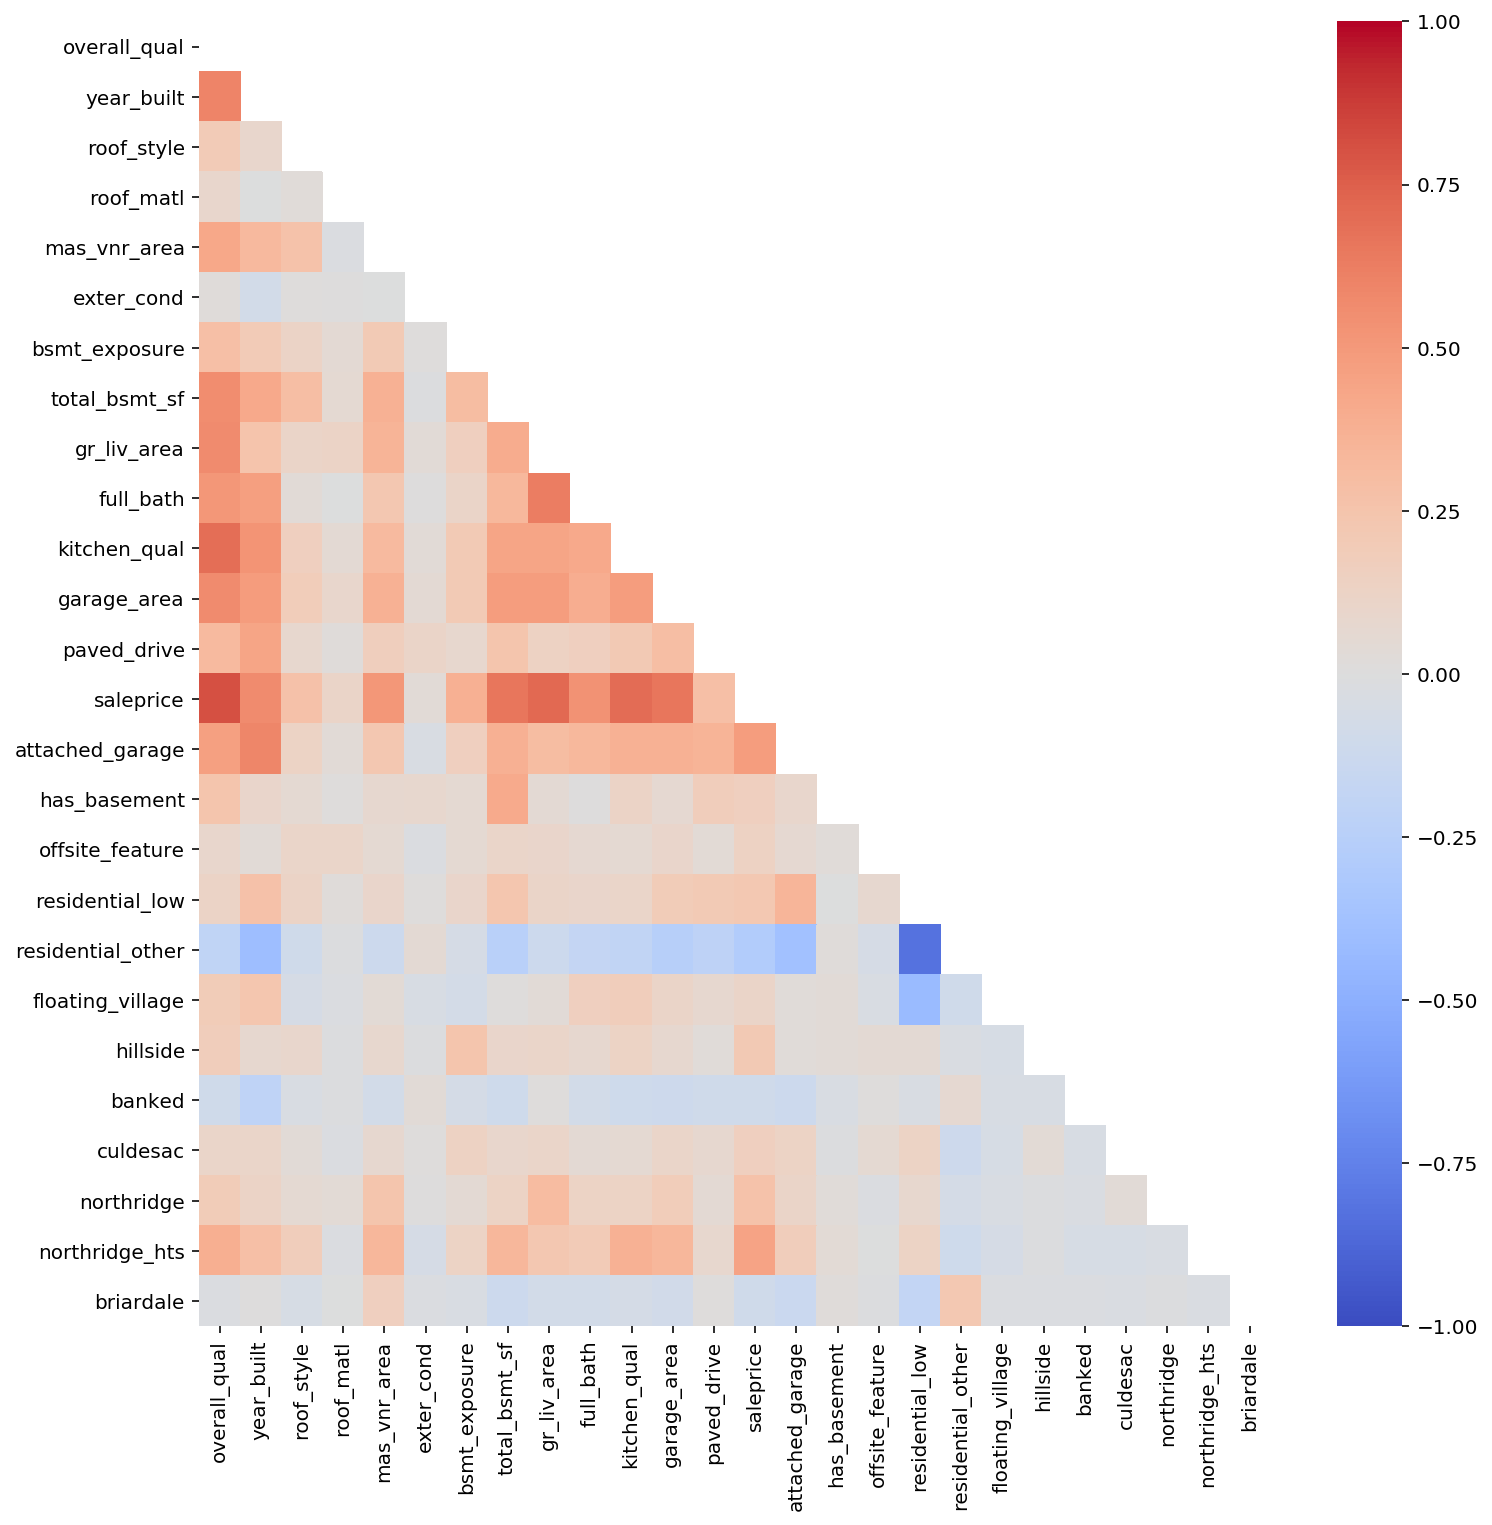

In [26]:
#code adpated from stackoverflow.com
plt.figure(figsize=(12,12))
corr = train.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, cmap = 'coolwarm', vmin = -1, annot=False, mask=mask);

In [27]:
corr.saleprice.sort_values()

residential_other   -0.281985
banked              -0.095109
briardale           -0.095053
exter_cond           0.036594
floating_village     0.109378
roof_matl            0.109678
offsite_feature      0.133574
has_basement         0.157378
culdesac             0.158427
hillside             0.214357
residential_low      0.225695
northridge           0.264479
roof_style           0.270672
paved_drive          0.288391
bsmt_exposure        0.375768
northridge_hts       0.451841
attached_garage      0.477679
mas_vnr_area         0.508404
full_bath            0.537421
year_built           0.570161
total_bsmt_sf        0.661295
garage_area          0.661932
kitchen_qual         0.696048
gr_liv_area          0.717496
overall_qual         0.809254
saleprice            1.000000
Name: saleprice, dtype: float64

### Price Distribution Graph

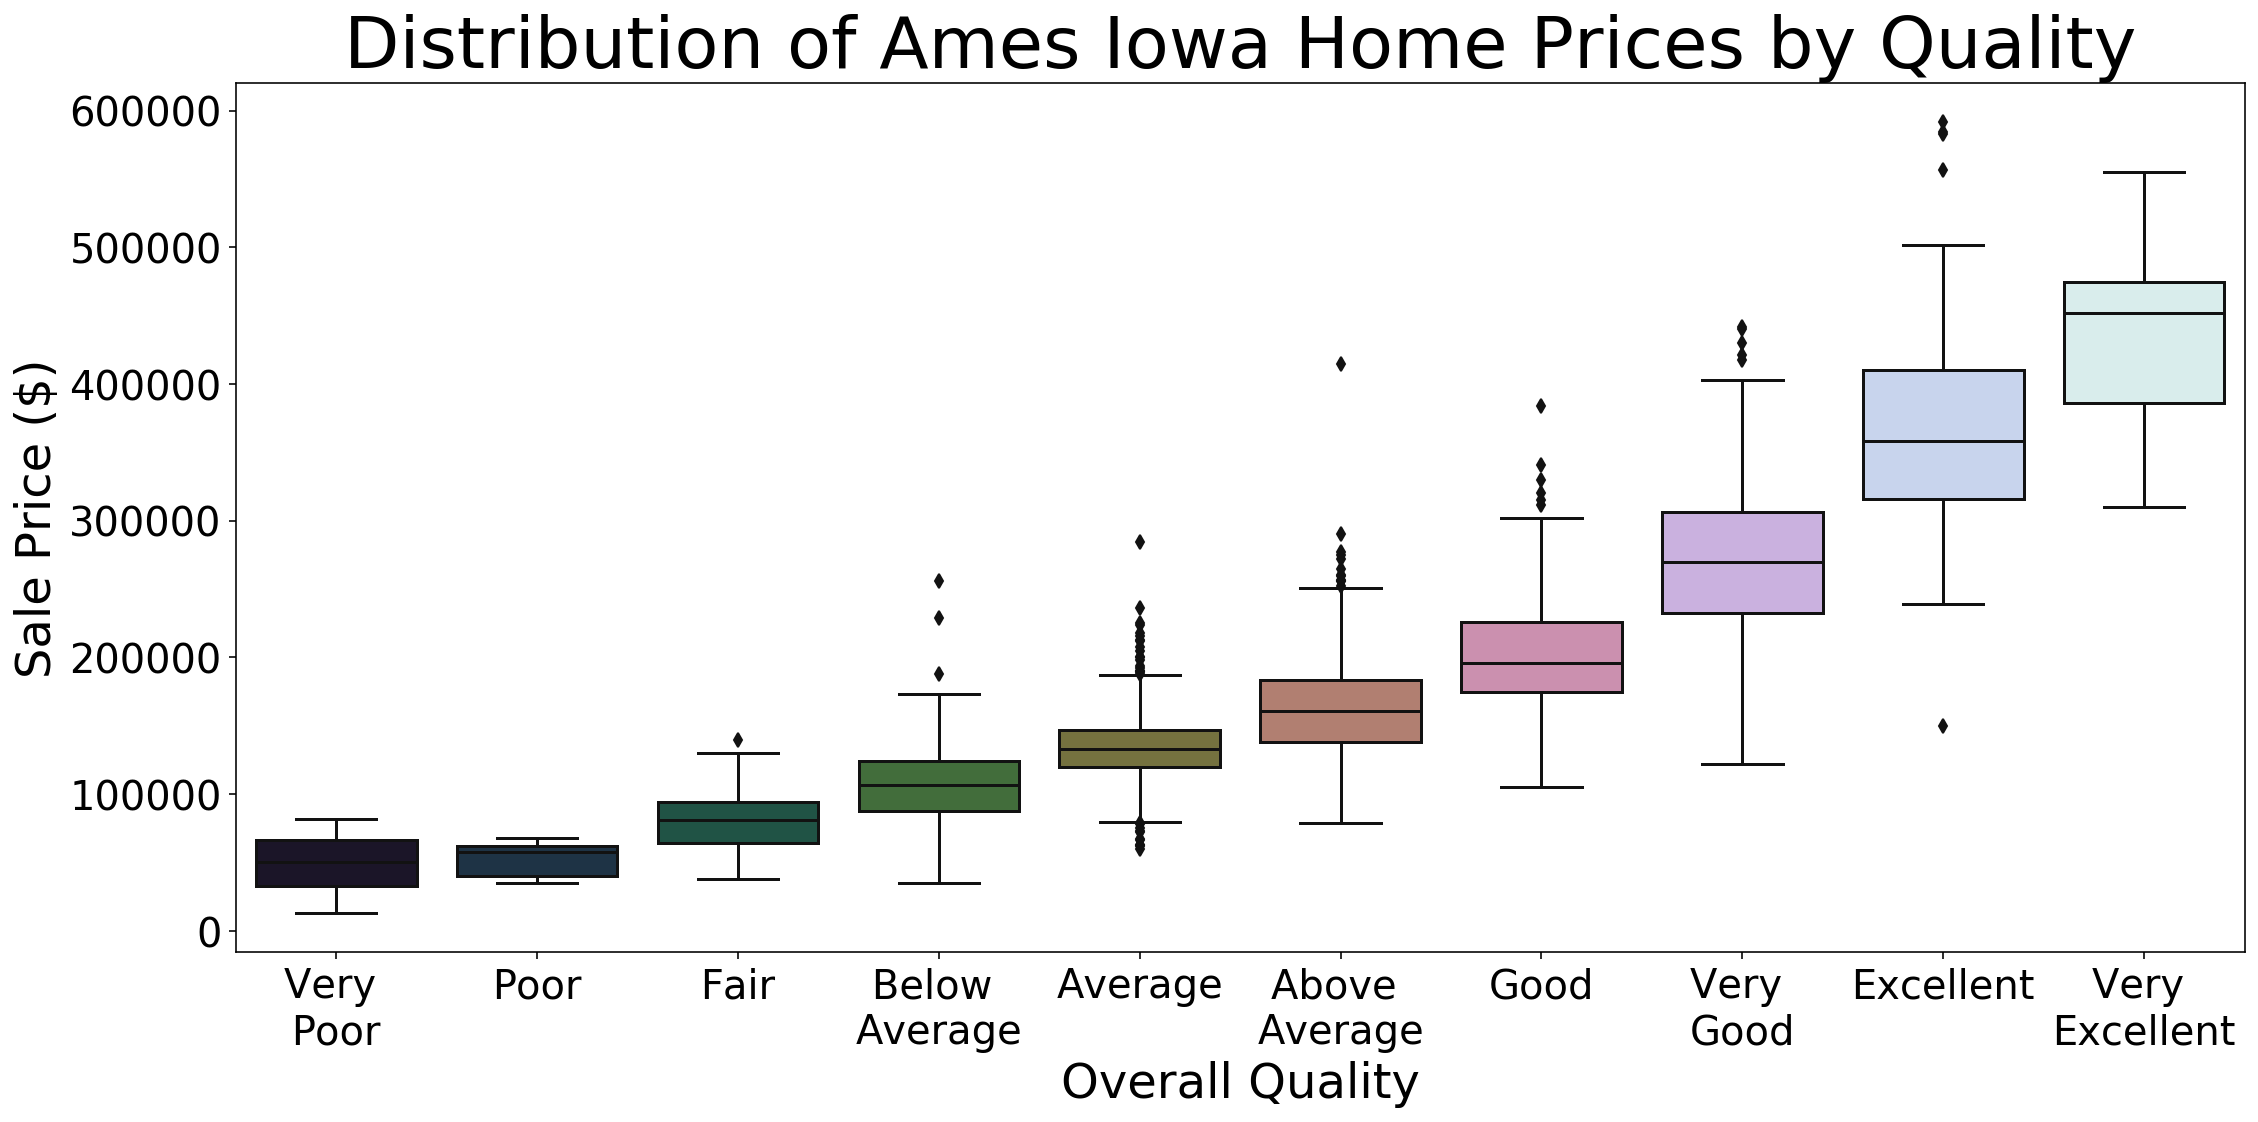

In [92]:
plt.figure(figsize=(18, 8)) #facecolor='gray')
plt.tick_params('both', labelsize=20)
plt.title('Distribution of Ames Iowa Home Prices by Quality', fontsize=36)
sns.boxplot(x=train.overall_qual, y=train.saleprice, palette='cubehelix')
plt.xticks(np.arange(10), ['Very \nPoor', 'Poor', 'Fair', 'Below \nAverage', 'Average', 
                           'Above \nAverage','Good', 'Very \nGood', 'Excellent', 'Very \nExcellent'])
plt.ylabel('Sale Price ($)', fontsize=24)
plt.xlabel('Overall Quality', fontsize=24);

### Baseline Score

In [28]:
features = [x for x in train.columns if x not in ['saleprice', 'id', 'pid']]

X = train[features]
y = train['saleprice']

In [29]:
lr = LinearRegression()

In [30]:
#train['ms_zoning'].value_counts()

In [31]:
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
lr.score(X, y)

0.8767449703312509

In [33]:
train['saleprice'].head()

0    220000
1    140000
2    112500
3    135000
4     85400
Name: saleprice, dtype: int64

## Scenario 1: Inputs =  Overall Qual, gr liv area, year built, attached garage

In [88]:
features1 = ['overall_qual', 'gr_liv_area', 'year_built', 'attached_garage']
X1 = train[features1]
y1 = train['saleprice']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state = 42)

lr1 = LinearRegression()
lr1.fit(X1_train, y1_train)

y_pred1 = lr1.predict(X1)
resids1 = y1-y_pred1

print(f'Train R2 = {lr1.score(X1_train, y1_train)}')
print(f'Test R2 = {lr1.score(X1_test, y1_test)}')
print(f'Cross Val Score = {cross_val_score(lr1, X1_train, y1_train, cv=5).mean()}')
print(f'MSE = {mean_squared_error(y1, y_pred1)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y1, y_pred1))}')


Train R2 = 0.7814186041079866
Test R2 = 0.7634188560435031
Cross Val Score = 0.7789879096740661
MSE = 1410470427.8466876
RMSE = 37556.23021346375


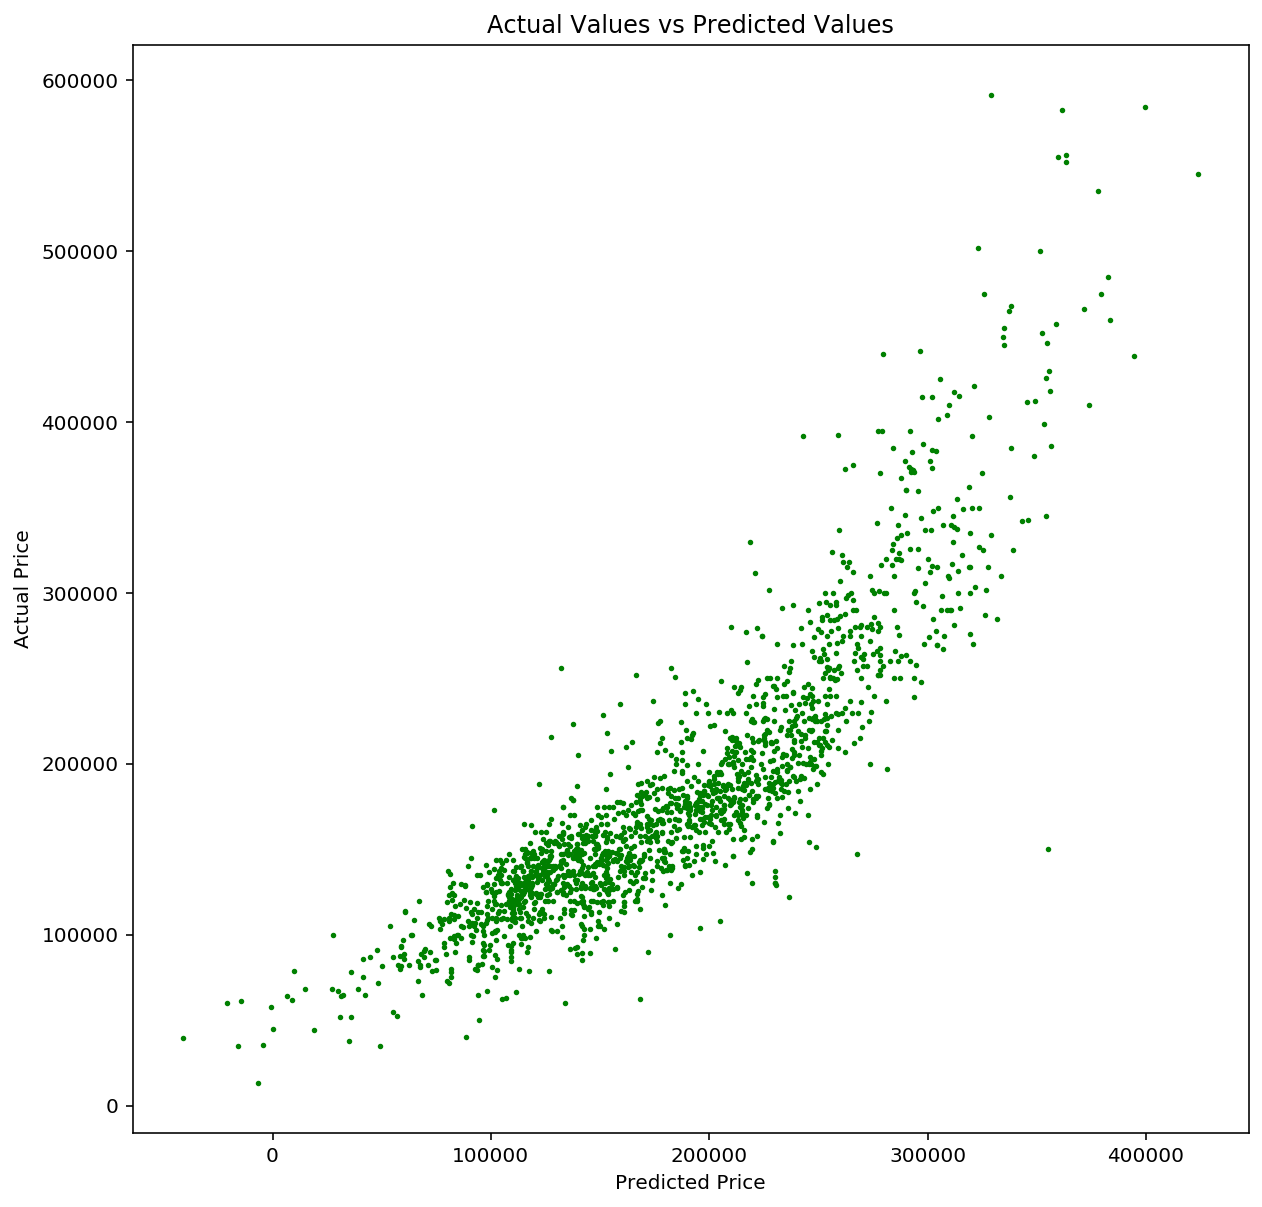

In [35]:
plt.figure(figsize = (10,10))

plt.scatter(y_pred1, y1, c='green', s = 3)
plt.xlabel('Predicted Price')
plt.title('Actual Values vs Predicted Values')
plt.ylabel('Actual Price');

In [36]:
X2 = train[features1]
y2 = np.log(train['saleprice'])

In [78]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state = 42)

lr2 = LinearRegression()
lr2.fit(X2_train, y2_train)

y_pred2 = lr2.predict(X2_train)
resids2 = np.exp(y2_train)-np.exp(y_pred2)

print(f'Train R2 = {lr2.score(X2_train, y2_train)}')
print(f'Test R2 = {lr2.score(X2_test, y2_test)}')
print(f'Cross Val Score = {cross_val_score(lr2, X2_train, y2_train, cv=5).mean()}')
#print(f'MSE = {mean_squared_error(y2, y_pred2)}')
#print(f'RMSE = {np.sqrt(mean_squared_error(y2, y_pred2))}')

Train R2 = 0.8236751029104411
Test R2 = 0.8128294260193571
Cross Val Score = 0.8210694073481578


In [38]:
train['log_gr_liv_area'] = np.log(train['gr_liv_area'])
test['log_gr_liv_area'] = np.log(test['gr_liv_area'])
features3 = ['overall_qual', 'log_gr_liv_area', 'year_built', 'attached_garage']
X3 = train[features3]
y3 = np.log(train['saleprice'])

In [79]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, random_state = 42)

lr3 = LinearRegression()
lr3.fit(X3_train, y3_train)

print(f'Train R2 = {lr3.score(X3_train, y3_train)}')
print(f'Test R2 = {lr3.score(X3_test, y3_test)}')
print(f'Cross Val Score = {cross_val_score(lr3, X3_train, y3_train, cv=5).mean()}')

y_pred3 = lr3.predict(X3)
resids3 = np.exp(y3)-np.exp(y_pred3)

print(f'MSE = {mean_squared_error(y3, y_pred3)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y3, y_pred3))}')

Train R2 = 0.8217182114112451
Test R2 = 0.8091992481155662
Cross Val Score = 0.8189838782243555
MSE = 0.030341178791452143
RMSE = 0.17418719468276692


In [82]:
ss = StandardScaler()
ss.fit(X2_train)
X4_train_sc = ss.transform(X2_train)
X4_test_sc = ss.transform(X2_test)
r_alphas = np.logspace(0, 5, 100)
ridge_model4 = RidgeCV(alphas=r_alphas, scoring='r2', cv=5)
ridge_model4 = ridge_model4.fit(X4_train_sc, y2_train)

y_pred4 = ridge_model4.predict(X4_train_sc)
y_pred_test4 = ridge_model4.predict(X4_test_sc)

print(f'Train R2 = {r2_score(np.exp(y2_train), np.exp(y_pred4))}')
print(f'Test R2 = {r2_score(np.exp(y2_test), np.exp(y_pred_test4))}')

resids4 = np.exp(y2_train) - np.exp(y_pred4)

#print(f'MSE = {mean_squared_error(y3, y_pred4)}')
#print(f'RMSE = {np.sqrt(mean_squared_error(y3, y_pred4))}')

Train R2 = 0.8434572605732281
Test R2 = 0.8086866697270055


In [41]:
# ^^ overfitting?

In [42]:
y_test_pred4 = np.exp(ridge_model4.predict(test[features1]))
y_test_df = pd.DataFrame(index=test['id'], data=y_test_pred4, columns=['saleprice'])

In [43]:
l_alphas = np.logspace(-25, -24, 10)
lasso_model5 = LassoCV(alphas=l_alphas, cv=5)
lasso_model5 = lasso_model5.fit(X4_train_sc, y2_train)

In [44]:
lasso_model5.alpha_

5.994842503189421e-25

In [45]:
y_pred5 = lasso_model5.predict(X4_train_sc)
y_pred_test5 = lasso_model5.predict(X4_test_sc)

print(r2_score(y2_train, y_pred5))
print(r2_score(y2_test, y_pred_test5))

resids5 = np.exp(y2_train) - np.exp(y_pred5)

0.8236751029104412
0.812829426019357


''

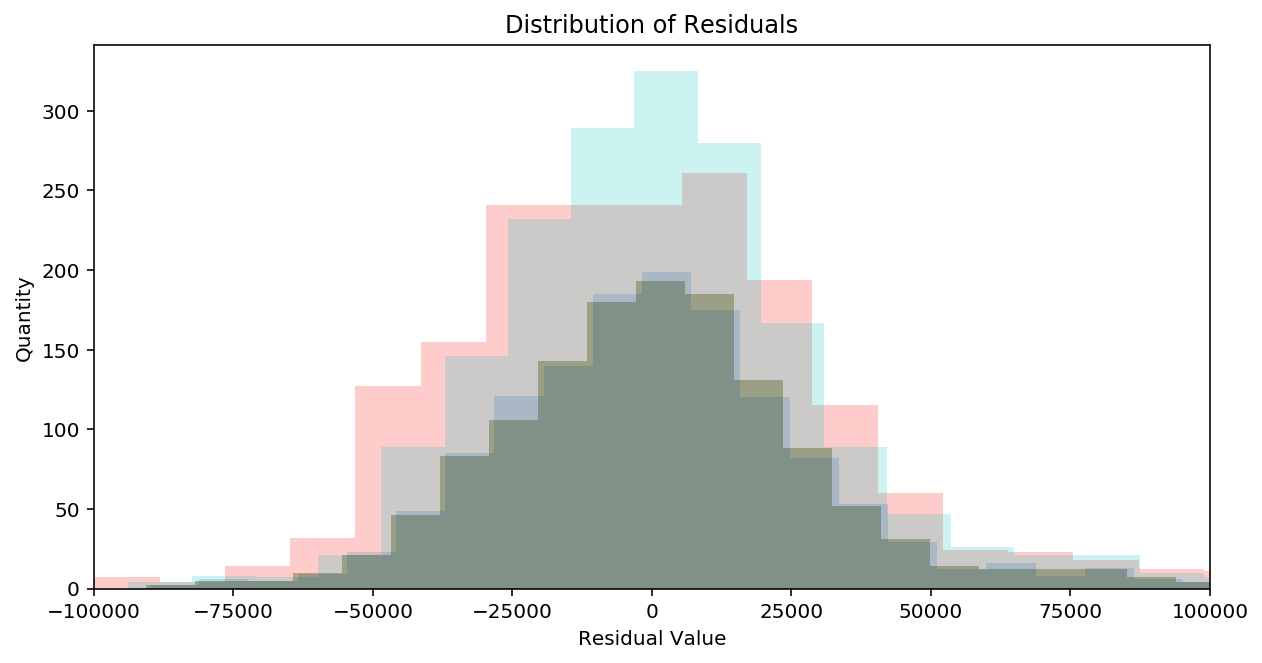

In [46]:
plt.figure(figsize = (10,5))
plt.title('Distribution of Residuals')
plt.xlabel('Residual Value')
plt.ylabel('Quantity')
plt.hist(resids1, bins =40, color='r', alpha=.2)
plt.hist(resids2, bins =40, color='y', alpha=.2)
plt.hist(resids3, bins =40, color='c', alpha=.2)
plt.hist(resids4, bins =40, alpha=.2)
plt.hist(resids5, bins =40, color='black', alpha=.2)
plt.xlim(-100000,100000)
;

## Scenario 2:  Inputs - all variables

In [84]:
X6 = train.drop('saleprice', axis=1)
y6 = train['saleprice']

X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y6, random_state = 42)

lr6 = LinearRegression()
lr6.fit(X6_train, y6_train)

print(f'Train R2 = {lr6.score(X6_train, y6_train)}')
print(f'Test R2 = {lr6.score(X6_test, y6_test)}')
print(f'Cross Val Score = {cross_val_score(lr6, X6_train, y6_train, cv=5).mean()}')

y_pred6 = lr6.predict(X6_train)
resids6 = y6_train-y_pred6

#print(f'MSE = {mean_squared_error(y6, y_pred6)}')
#print(f'RMSE = {np.sqrt(mean_squared_error(y6, y_pred6))}')

Train R2 = 0.8961505748597766
Test R2 = 0.8500331219404833
Cross Val Score = 0.8870468560824063


In [91]:
#corr2 = train.drop('saleprice', axis=1).corr()['overall_qual'].sort_values(ascending=False)
#corr2 =pd.DataFrame(corr2)
#corr2

In [86]:
X7 = train.drop('saleprice', axis=1)
y7 = np.log(train['saleprice'])

X7_train, X7_test, y7_train, y7_test = train_test_split(X7, y7, random_state = 42)

lr7 = LinearRegression()
lr7.fit(X7_train, y7_train)

print(f'Train R2 = {lr7.score(X7_train, y7_train)}')
print(f'Test R2 = {lr7.score(X7_test, y7_test)}')
print(f'Cross Val Score = {cross_val_score(lr7, X7_train, y7_train, cv=5).mean()}')

y_pred7 = lr7.predict(X7_train)
resids7 = np.exp(y7_train)-np.exp(y_pred7)

#print(f'MSE = {mean_squared_error(y7, y_pred7)}')
#print(f'RMSE = {np.sqrt(mean_squared_error(y7, y_pred7))}')

Train R2 = 0.8964320714961812
Test R2 = 0.8564037169112451
Cross Val Score = 0.886058009383196


In [49]:
X8 = train.drop('saleprice', axis=1)
y8 = np.log(train['saleprice'])

X8_train, X8_test, y8_train, y8_test = train_test_split(X8, y8, random_state = 42)

ss = StandardScaler()
ss.fit(X8_train)
X8_train_sc = ss.transform(X8_train)
X8_test_sc = ss.transform(X8_test)

lr8 = LinearRegression()

ridge8 = RidgeCV()
ridge8.fit(X8_train_sc, y8_train);


y_pred8 = ridge8.predict(X8_train_sc)
y_pred_test8 = ridge8.predict(X8_test_sc)

print(f'Train R2 = {r2_score(y8_train, y_pred8)}')
print(f'Test R2 = {r2_score(y8_test, y_pred_test8)}')
print(f'Cross Val Score = {cross_val_score(ridge8, X8_train_sc, y8_train, cv=5).mean()}')

resids8 = np.exp(y8_train)-np.exp(y_pred8)

Train R2 = 0.8956554466318483
Test R2 = 0.8600877403954595
Cross Val Score = 0.8857150160954994


In [50]:
#to use for later

#for inx, col_name in enumerate(X_train.columns):
    #print("The coefficient for {} is {}".format(col_name, ridge8.coef_[0][inx]))

In [51]:
coef8 = pd.DataFrame()
coef8['columns'] = X8.columns
coef8['coefs'] = ridge8.coef_
coef8.sort_values('coefs')

,columns,coefs
24,briardale,-0.012239
9,full_bath,-0.006696
20,banked,0.001742
3,roof_matl,0.002568
2,roof_style,0.005333
22,northridge,0.006970
15,offsite_feature,0.008396
14,has_basement,0.010993
4,mas_vnr_area,0.011006
21,culdesac,0.013866


''

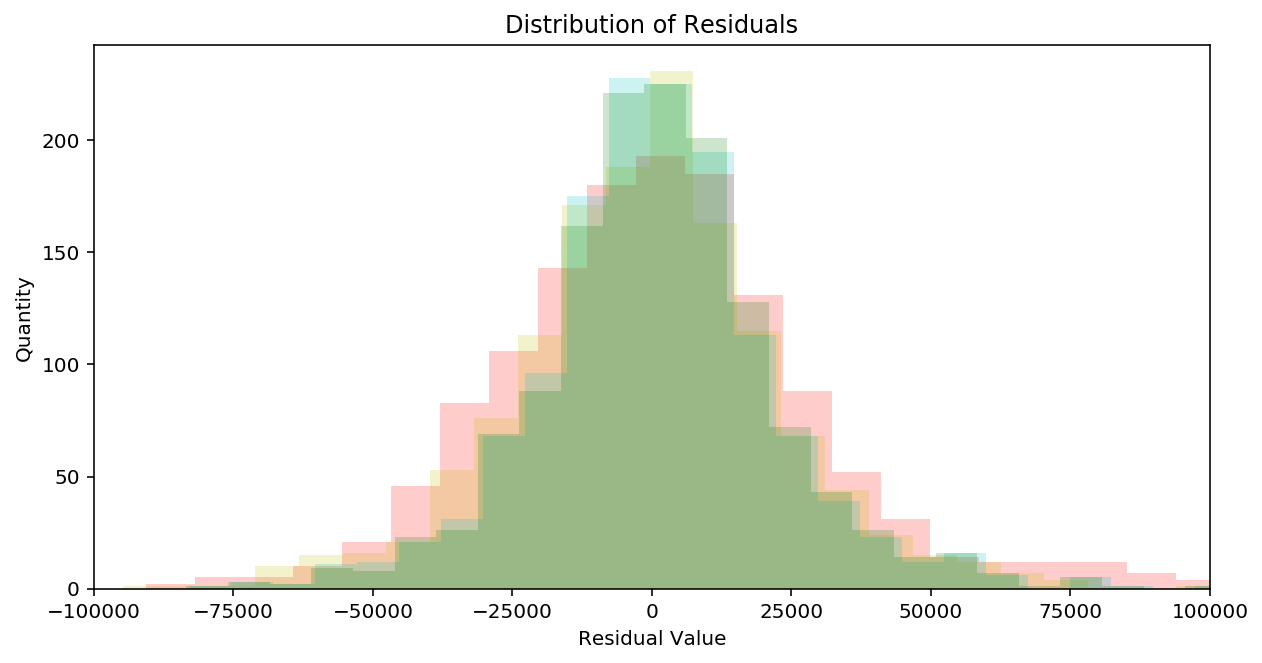

In [52]:
plt.figure(figsize = (10,5))
plt.title('Distribution of Residuals')
plt.xlabel('Residual Value')
plt.ylabel('Quantity')
plt.hist(resids2, bins =40, color='r', alpha=.2)
plt.hist(resids6, bins =40, color='y', alpha=.2)
plt.hist(resids7, bins =40, color='c', alpha=.2)
plt.hist(resids8, bins =40, color='g', alpha=.2)
plt.xlim(-100000,100000)
;

## Scenario 3: Using different inputs 

In [53]:
features10 = ['residential_low', 'residential_other', 
              'overall_qual', 'log_gr_liv_area', 'total_bsmt_sf',
              'floating_village', 'year_built', 'kitchen_qual']
X10 = train[features10]
y10 = np.log(train['saleprice'])

# Not splitting - exploratory
# variance issues are of less concern
# X10_train, X10_test, y10_train, y_test = train_test_split(X7, y7, random_state = 42)


lr10 = LinearRegression()
lr10.fit(X10, y10)

print(f'Train R2 = {lr10.score(X10, y10)}')
print(f'Cross Val Score = {cross_val_score(lr10, X10, y10, cv=5).mean()}')

y_pred10 = lr10.predict(X10)
resids10 = np.exp(y10)-np.exp(y10)

Train R2 = 0.8621957498777378
Cross Val Score = 0.8572568201673167


In [54]:
# basement square feet needs to be a square root function
#this is based off a scatter plot I ran (not in this notebook to cut down on scrolling you might be doing right now) comparing basement sqft with log price year built

train['log_total_bsmt_sf'] = np.log(train['total_bsmt_sf']+.01)
test['log_total_bsmt_sf'] = np.log(test['total_bsmt_sf']+.01)

train['sqrt_gr_liv_area'] = train['gr_liv_area']**0.5
test['sqrt_gr_liv_area'] = test['gr_liv_area']**0.5

In [55]:
features11 = ['residential_low', 'residential_other', 'log_total_bsmt_sf',
              'overall_qual', 'sqrt_gr_liv_area', 'total_bsmt_sf',
              'floating_village', 'year_built', 'kitchen_qual', 'gr_liv_area']
X11 = train[features11]
y11 = np.log(train['saleprice'])

# Not splitting - exploratory
# and variance issues are of less concern
# X10_train, X10_test, y10_train, y_test = train_test_split(X7, y7, random_state = 42)


lr11 = LinearRegression()
lr11.fit(X11, y11)

print(f'Train R2 = {lr11.score(X11, y11)}')
print(f'Cross Val Score = {cross_val_score(lr11, X11, y11, cv=5).mean()}')

y_pred11 = lr11.predict(X11)
resids11 = np.exp(y11)-np.exp(y11)

Train R2 = 0.86400175810571
Cross Val Score = 0.8586322443999201


In [56]:
features12 = ['residential_low', 'residential_other', 'log_total_bsmt_sf',
              'overall_qual', 'sqrt_gr_liv_area', 'total_bsmt_sf',
              'floating_village', 'year_built', 'kitchen_qual', 'gr_liv_area',
              'garage_area', 'bsmt_exposure', 'exter_cond', 'paved_drive',
              'northridge_hts', 'attached_garage', 'full_bath', 'hillside', 'roof_style'
             ]
X12 = train[features12]
y12 = np.log(train['saleprice'])

# Not splitting -  exploratory
# variance issues are of less concern
# X10_train, X10_test, y10_train, y_test = train_test_split(X7, y7, random_state = 42)


lr12 = LinearRegression()
lr12.fit(X12, y12)

print(f'Train R2 = {lr12.score(X12, y12)}')
print(f'Cross Val Score = {cross_val_score(lr12, X12, y12, cv=5).mean()}')

y_pred12 = lr12.predict(X12)
resids12 = np.exp(y12)-np.exp(y12)

Train R2 = 0.8860207556456977
Cross Val Score = 0.880319129935254


In [57]:
X13 = train[features12]
y13 = np.log(train['saleprice'])

X13_train, X13_test, y13_train, y13_test = train_test_split(X13, y13, random_state = 42)

ss = StandardScaler()
ss.fit(X13_train)
X13_train_sc = ss.transform(X13_train)
X13_test_sc = ss.transform(X13_test)

ridge13 = RidgeCV()
ridge13.fit(X13_train_sc, y13_train);


y_pred13 = ridge13.predict(X13_train_sc)
y_pred_test13 = ridge13.predict(X13_test_sc)

print(f'Train R2 = {r2_score(y13_train, y_pred13)}')
print(f'Test R2 = {r2_score(y13_test, y_pred_test13)}')
print(f'Cross Val Score = {cross_val_score(ridge13, X13_train_sc, y13_train, cv=5).mean()}')

resids13 = np.exp(y13_train)-np.exp(y_pred13)

Train R2 = 0.8929785604604683
Test R2 = 0.8597837379772769
Cross Val Score = 0.8851979246712677


In [58]:
X14 = train[features12]
y14 = np.log(train['saleprice'])
X_test = test[features12]

X14_train, X14_test, y14_train, y14_test = train_test_split(X14, y14, random_state = 12, test_size=0.1)

ss = StandardScaler()
ss.fit(X14_train)
X14_train_sc = ss.transform(X14_train)
X14_test_sc = ss.transform(X14_test)
X_test_sc = ss.transform(X_test)

l_alphas = np.logspace(-4, -3, 1000)
lasso_model14 = LassoCV(alphas=l_alphas, cv=5)
lasso_model14 = lasso_model14.fit(X14_train_sc, y14_train)

print (lasso_model14.alpha_)

y_pred14 = lasso_model14.predict(X14_train_sc)
y_pred_test14 = lasso_model14.predict(X14_test_sc)
y_test = lasso_model14.predict(X_test_sc)

print(f'Train R2 = {r2_score(np.exp(y14_train), np.exp(y_pred14))}')
print(f'Test R2 = {r2_score(np.exp(y14_test), np.exp(y_pred_test14))}')
print(f'Cross Val Score = {cross_val_score(lasso_model14, X14_train_sc, y14_train, cv=5).mean()}')

resids14 = np.exp(y14_train) - np.exp(y_pred14)

0.00099310918137498
Train R2 = 0.9062230328135535
Test R2 = 0.8650360543447493
Cross Val Score = 0.8757381363836612


In [59]:
coef14 = pd.DataFrame()
coef14['columns'] = X14.columns
coef14['coefs'] = lasso_model14.coef_
coef14.sort_values('coefs')

#Reminder - the coefficient value represents the mean change in the response given a one unit change in the predictor 
#for hillside, the coefficent is 0.014, the mean response value increases by 0.014 for ever one unit change in sale price 

,columns,coefs
16,full_bath,-0.010979
18,roof_style,0.005215
2,log_total_bsmt_sf,0.007702
14,northridge_hts,0.010085
17,hillside,0.014963
15,attached_garage,0.017550
13,paved_drive,0.017819
11,bsmt_exposure,0.025582
12,exter_cond,0.026035
1,residential_other,0.032780


## Scenario 4: Polynomial Fit

In [60]:
#running this to to try and fit a polynomial line so we can achieve a minimum error or cost fuction 
#advantages of polynomial regression: Polynomial provides the best approximation of the relationship between the dependent and independent variable.

In [61]:
features18 = ['residential_low', 'overall_qual', 'gr_liv_area', 'total_bsmt_sf', 
           'floating_village']
X18 = train[features18]
y18 = np.log(train['saleprice'])

poly = PolynomialFeatures(include_bias=False)
X_poly = poly.fit_transform(X18)

X18_train, X18_test, y18_train, y18_test = train_test_split(X_poly, y18, random_state = 12, test_size=0.2)

ss = StandardScaler()
ss.fit(X18_train)
X18_train_sc = ss.transform(X18_train)
X18_test_sc = ss.transform(X18_test)

l_alphas = np.logspace(-15, -12, 1000)
lasso_model18 = LassoCV(alphas=l_alphas, cv=5)
lasso_model18 = lasso_model18.fit(X18_train_sc, y18_train)

print (lasso_model18.alpha_)

y_pred18 = lasso_model18.predict(X18_train_sc)
y_pred_test18 = lasso_model18.predict(X18_test_sc)

print(f'Train R2 = {r2_score(np.exp(y18_train), np.exp(y_pred18))}')
print(f'Test R2 = {r2_score(np.exp(y18_test), np.exp(y_pred_test18))}')
print(f'Cross Val Score = {cross_val_score(lasso_model18, X18_train_sc, y18_train, cv=5).mean()}')

resids18 = y18_train - y_pred18

1e-12
Train R2 = 0.8784744611664729
Test R2 = 0.8531878653514732
Cross Val Score = 0.8371242199863522


In [62]:
coef18 = pd.DataFrame()
coef18['columns'] = poly.get_feature_names(features18)
coef18['coefs'] = lasso_model18.coef_
coef18.sort_values('coefs')

,columns,coefs
10,overall_qual^2,-0.155585
13,overall_qual floating_village,-0.148545
6,residential_low overall_qual,-0.114162
15,gr_liv_area total_bsmt_sf,-0.104311
8,residential_low total_bsmt_sf,-0.088822
14,gr_liv_area^2,-0.063407
17,total_bsmt_sf^2,-0.040713
18,total_bsmt_sf floating_village,-0.040166
5,residential_low^2,-0.028372
9,residential_low floating_village,0.000000


In [65]:
#Actuals vs predited 
#plt.figure(figsize=(14,8), facecolor='gray')
#plt.scatter(y_test, y_test_pred, alpha=0.5, s=9, color='green')
#plt.plot((0, 600_000), (0, 600_000), color='gray')
#plt.xlabel('Actual Price', size=14)
#plt.ylabel('Predicted', size=14);
#plt.title('Actual Values vs Predicted Values', fontsize=36);

In [66]:
train.to_csv('/Users/annamitchell/Desktop/GA_Docs/Projects/Ames_Project_3/datasets/train_presentation.csv')

In [69]:
test.to_csv('/Users/annamitchell/Desktop/GA_Docs/Projects/Ames_Project_3/datasets/test_presentation.csv')